In [50]:
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [3]:
def linear(param,x):
    w, b = param
    return w*x + b
def ReLU(z):
    return np.maximum(0,z)
def softplus(z):
    return np.log(1+np.exp(z))
def simple(z):
    return z

In [5]:
data_x = np.linspace(0,1,10)
data_y = data_x * (1-data_x)

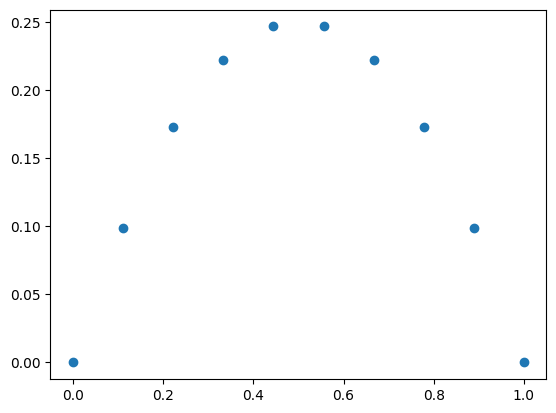

In [7]:
plt.scatter(data_x, data_y)

In [9]:
# In this case, we can do polynomial regression, but lets fit this data with NN.

In [11]:
length = 2
def rn(length):
 return [random.uniform(-1, 1) for _ in range(length)]

In [13]:
def neuron(param,x):
    return softplus(linear(param,x))

[0.06088007524541417, 0.23429371974092383] [0.3970386218719253, -0.9204666859984136] [-0.1842889347555634, -0.7319238940225383] [-0.8347145628254995, 0.023176912163000996]


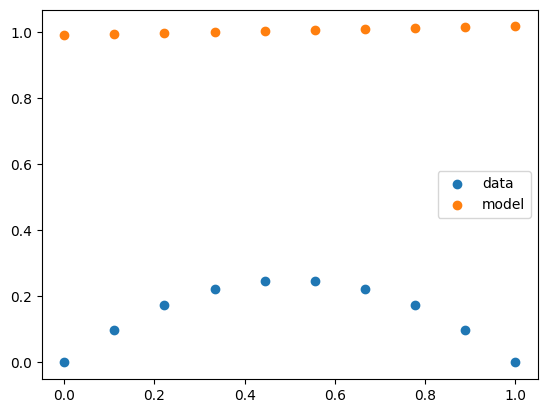

In [15]:
param1 = rn(2) 
param2 = rn(2)
param3 = rn(2)
param4 = rn(2)
print(param1, param2, param3, param4)
def neural_network(data):
    final_value = np.zeros(len(data))
    for i in range(len(data)):
        neuron_11 = neuron(param1,data[i])
        neuron_21 = neuron(param2,neuron_11)
        neuron_12 = neuron(param3,data[i])
        neuron_22 = neuron(param4,neuron_12)
        final_value[i] = neuron_21+neuron_22
    return final_value

predicted_y = neural_network(data_x)
plt.scatter(data_x, data_y, label = 'data')
plt.scatter(data_x, predicted_y, label ='model')
plt.legend()
plt.show()

In [17]:
#we have a model but that does not fit the data we have, because weights and bias are random,
#for a different set of weights and bias, we get a different model, re-run and check for yourself!
#Now we need to find the optimal w's and b's = params, to update w's and b's we need cost function typically the cost function minimizes the
#difference between y values and our model values
#it is MSE, obviously!
#you can also use different activation function and see it creates new models

In [62]:
data_x = data_x.reshape(-1, 1)
data_y = data_y.reshape(-1, 1)

# Build the model
model1 = keras.Sequential([
    layers.Input(shape=(1,)),         # Input layer: 1 input feature
    layers.Dense(2, activation='softplus'), # Hidden layer: 2 neurons, softmax activation
    layers.Dense(1, activation='softplus')                    # Output layer: 1 neuron (linear activation by default)
])


In [44]:
model1.compile(optimizer='adam', loss='mse')
history = model1.fit(data_x, data_y, epochs=20, verbose=0)

In [46]:
predictions1 = model1.predict(data_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


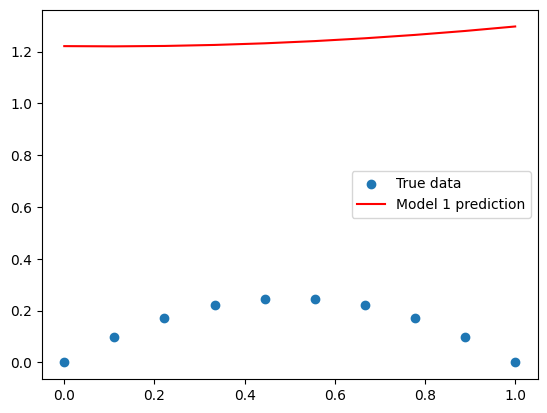

In [48]:
plt.scatter(data_x, data_y, label='True data')
plt.plot(data_x, predictions1, color='red', label='Model 1 prediction')
plt.legend()
plt.show()

In [66]:
#we dont have enough neurons to make a better prediction, so we increase the neurons size in model2

In [94]:
model2 = keras.Sequential([
    layers.Input(shape=(1,)),         # Input layer: 1 input feature
    layers.Dense(10, activation='relu'), # Hidden layer: 10 neurons, relu activation
    layers.Dense(1, activation='relu')                    # Output layer: 1 neuron (linear activation by default)
])

In [100]:
model2.compile(optimizer='adam', loss='mse')
history2 = model2.fit(data_x, data_y, epochs=100, verbose=0)

In [101]:
predictions2 = model2.predict(data_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [116]:
for layer in model2.layers:
    weights, biases = layer.get_weights()
    print(f"Weights:\n{weights}\nBiases:\n{biases}\n")

Weights:
[[-0.50280285 -0.5465861   0.17390984 -0.6062065  -0.593255   -0.03518856
   0.54957825 -0.01006073 -0.1717912   0.6049846 ]]
Biases:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Weights:
[[ 0.36262482]
 [ 0.21389955]
 [ 0.2299332 ]
 [ 0.600787  ]
 [-0.4937083 ]
 [-0.24466544]
 [-0.62775314]
 [-0.447287  ]
 [-0.6851908 ]
 [ 0.32293004]]
Biases:
[0.]



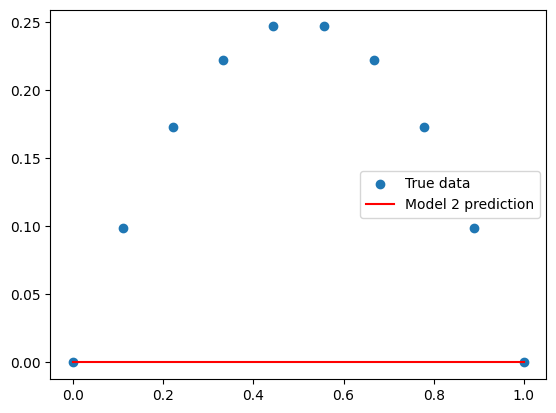

In [102]:
plt.scatter(data_x, data_y, label='True data')
plt.plot(data_x, predictions2, color='red', label='Model 2 prediction')
plt.legend()
plt.show()

In [126]:
model3 = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(20, activation='softplus'),
    layers.Dense(20, activation='softplus'),
    layers.Dense(1)
])

In [166]:
model3.compile(optimizer='adam', loss='mse')
history3 = model3.fit(data_x, data_y, epochs=500, verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0067
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0125
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0135
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0109
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0067
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0106
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0099
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0067
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0076
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0093
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0079
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0064
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0074
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0082
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0072
Epoch 16/500
1/1 ━━━━

In [167]:
predictions3 = model3.predict(data_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [168]:
for layer in model3.layers:
    weights, biases = layer.get_weights()
    print(f"Weights:\n{weights}\nBiases:\n{biases}\n")

Weights:
[[ 0.69585127 -0.07537875 -0.19539656  0.287673    0.15414377 -0.38099474
  -0.10130943 -0.07250357  0.61993563  0.02797675  0.3620631   0.6061078
  -0.19884145  0.57211995  0.1102706   0.6827856  -0.14586534  0.15840961
   0.6103126  -0.6328185 ]]
Biases:
[ 5.7221935e-03  4.6407200e-02  1.7678240e-02 -2.6323082e-02
  4.9427715e-03 -6.9367416e-02  1.1930271e-02  6.5937070e-03
  6.6836299e-03  1.6335189e-06  2.1806334e-03  5.5602482e-03
  5.3857436e-04 -2.4394515e-04  1.5831457e-02  9.3595488e-03
  1.8654663e-02  7.9424458e-04 -4.9759028e-03  4.6327554e-02]

Weights:
[[ 2.35317230e-01 -2.39999503e-01 -1.13552392e-01  2.42951572e-01
  -2.65872419e-01 -2.15540603e-01  7.80506730e-02 -2.32919574e-01
  -8.65910351e-02  2.42902577e-01 -2.65117556e-01 -9.58057195e-02
   1.18296415e-01  3.32065523e-02 -2.31691509e-01  2.15585798e-01
   1.79886609e-01 -8.53192508e-02 -3.85842063e-02  1.59053668e-01
   1.61384493e-01  2.72959203e-01 -7.19560385e-02  2.27139685e-02
  -1.74909949e-01 -1.0

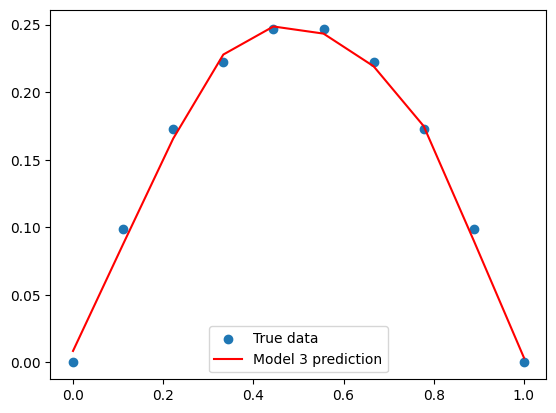

In [174]:
plt.scatter(data_x, data_y, label='True data')
plt.plot(data_x, predictions3, color='red', label='Model 3 prediction')
plt.legend()
plt.show()